In [45]:
# Bibliotheken importieren
import pandas as pd
from PyTree import ClassificationTree as ct
from ipywidgets import interactive
from plotly.offline import iplot
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()

In [46]:
# Trainingsdaten einlesen -> "data frame df_käfer_trainingsdaten"
df_spiel_trainingsdaten = pd.read_csv('spielen.csv', sep=';')

# zeige den Anfang des Datensatzes "df_käfer_trainingsdaten" an
print("Trainingsdaten")
display(df_spiel_trainingsdaten)

Trainingsdaten


,Temperatur,Luftfeuchtigkeit,Spielen
0,28,87,nein
1,26,90,nein
2,27,78,ja
3,28,70,ja
4,22,80,ja
5,21,70,ja
6,23,65,ja
7,24,95,ja
8,23,70,ja
9,25,82,nein


In [47]:
square_layout = go.Layout(xaxis={'title':'Temperatur in Grad-Celsius','range':[20,30]},
                   yaxis={'title':'Luftfeuchtigkeit in %','range':[60,100]},
                   height=810,
                   width=810)

In [48]:
df_spiel_trainingsdaten.iplot('scatter', mode = 'markers',  layout = square_layout,
               x = 'Temperatur', 
               y = 'Luftfeuchtigkeit',
               categories = 'Spielen')

In [59]:
# Entscheidungsbaum initialisieren mit Zielvariable (hier in Spalte "Temperatur") und Trainingsdaten
tree = ct.DecisionTree(target = 'Spielen', data = df_spiel_trainingsdaten)

# Entscheidungsbaum mit einer Entscheidungsregel erstellen 

# threshold bedeutet Schwellenwert
def split(Attribut, Schwellenwert):
    tree.manual_split(attribute = Attribut,  threshold = Schwellenwert, node_nr = 1)                    
    display(tree.print_tree())                    
    
tree_widget = interactive(split,{'manual': True, 'manual_name': 'Erstelle Split'}, 
                          Attribut = ['Temperatur', 'Luftfeuchtigkeit'], Schwellenwert = (20,100,0.5)) 

display(tree_widget)

interactive(children=(Dropdown(description='Attribut', options=('Temperatur', 'Luftfeuchtigkeit'), value='Temp…

In [55]:
# Entscheidungsbaum initialisieren mit der Zielvariable (hier in Spalte "Spielen") 
# und den Trainingsdaten "df_spiel_trainingsdaten"
tree = ct.DecisionTree(target = 'Spielen', data = df_spiel_trainingsdaten)

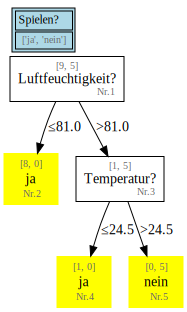

In [56]:
# Entscheidungsbaum automatisiert erstellen 
tree.grow_tree(max_depth=2)

# Entscheidungsbaum ausgeben
tree.print_tree()